In [1]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# CNN is for image classification

In [2]:
data = cifar10.load_data()

In [3]:
(trainFeatures, trainTarget), (testFeatures, testTarget) = data

In [4]:
print(data[1]) # 1 image
print('------------------------')
print(trainFeatures[1].shape)

(array([[[[158, 112,  49],
         [159, 111,  47],
         [165, 116,  51],
         ...,
         [137,  95,  36],
         [126,  91,  36],
         [116,  85,  33]],

        [[152, 112,  51],
         [151, 110,  40],
         [159, 114,  45],
         ...,
         [136,  95,  31],
         [125,  91,  32],
         [119,  88,  34]],

        [[151, 110,  47],
         [151, 109,  33],
         [158, 111,  36],
         ...,
         [139,  98,  34],
         [130,  95,  34],
         [120,  89,  33]],

        ...,

        [[ 68, 124, 177],
         [ 42, 100, 148],
         [ 31,  88, 137],
         ...,
         [ 38,  97, 146],
         [ 13,  64, 108],
         [ 40,  85, 127]],

        [[ 61, 116, 168],
         [ 49, 102, 148],
         [ 35,  85, 132],
         ...,
         [ 26,  82, 130],
         [ 29,  82, 126],
         [ 20,  64, 107]],

        [[ 54, 107, 160],
         [ 56, 105, 149],
         [ 45,  89, 132],
         ...,
         [ 24,  77, 124],
       

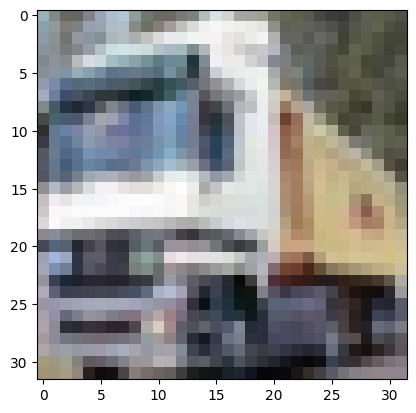

In [5]:
import matplotlib.pyplot as plt

plt.imshow(trainFeatures[1])

In [6]:
# https://www.cs.toronto.edu/~kriz/cifar.html

print(trainTarget)

animals = [2, 3, 4, 5, 6, 7]
vehicles = [0, 1, 8, 9]

[[6]
 [9]
 [9]
 ...
 [9]
 [1]
 [1]]


In [7]:
trainTarget = trainTarget.flatten()

for i in range(len(trainTarget)):
    if trainTarget[i] in animals:
        trainTarget[i] = 0
    else:
        trainTarget[i] = 1

print(trainTarget)

[0 1 1 ... 1 1 1]


In [8]:
trainTarget = to_categorical(trainTarget, 2)

print(trainTarget)

[[1. 0.]
 [0. 1.]
 [0. 1.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [9]:
testTarget = testTarget.flatten()

for i in range(len(testTarget)):
    if testTarget[i] in animals:
        testTarget[i] = 0
    else:
        testTarget[i] = 1

testTarget = to_categorical(testTarget, 2)

In [10]:
trainFeatures, testFeatures = trainFeatures/255, testFeatures/255

print(trainFeatures)

[[[[0.23137255 0.24313725 0.24705882]
   [0.16862745 0.18039216 0.17647059]
   [0.19607843 0.18823529 0.16862745]
   ...
   [0.61960784 0.51764706 0.42352941]
   [0.59607843 0.49019608 0.4       ]
   [0.58039216 0.48627451 0.40392157]]

  [[0.0627451  0.07843137 0.07843137]
   [0.         0.         0.        ]
   [0.07058824 0.03137255 0.        ]
   ...
   [0.48235294 0.34509804 0.21568627]
   [0.46666667 0.3254902  0.19607843]
   [0.47843137 0.34117647 0.22352941]]

  [[0.09803922 0.09411765 0.08235294]
   [0.0627451  0.02745098 0.        ]
   [0.19215686 0.10588235 0.03137255]
   ...
   [0.4627451  0.32941176 0.19607843]
   [0.47058824 0.32941176 0.19607843]
   [0.42745098 0.28627451 0.16470588]]

  ...

  [[0.81568627 0.66666667 0.37647059]
   [0.78823529 0.6        0.13333333]
   [0.77647059 0.63137255 0.10196078]
   ...
   [0.62745098 0.52156863 0.2745098 ]
   [0.21960784 0.12156863 0.02745098]
   [0.20784314 0.13333333 0.07843137]]

  [[0.70588235 0.54509804 0.37647059]
   [0.6

In [11]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)), # neurones, filter/kernel
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(2, activation='softmax') # amount of classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(trainFeatures, trainTarget, validation_data=(testFeatures, testTarget), verbose=1, epochs=10)

C:\Users\eyomi\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 14s 8ms/step - accuracy: 0.8787 - loss: 0.2908 - val_accuracy: 0.9040 - val_loss: 0.2424
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9140 - loss: 0.2155 - val_accuracy: 0.9206 - val_loss: 0.2000
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9234 - loss: 0.1942 - val_accuracy: 0.9126 - val_loss: 0.2188
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9324 - loss: 0.1722 - val_accuracy: 0.9284 - val_loss: 0.1790
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9406 - loss: 0.1537 - val_accuracy: 0.9260 - val_loss: 0.1908
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9455 - loss: 0.1388 - val_accuracy: 0.9294 - val_loss: 0.1790
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 13s 8ms/step - accuracy: 0.9536 - loss: 0.1209 - val_accuracy: 0.9284 - val_loss: 0.1900
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 8ms/step - accuracy: 0.9583 - loss: 0

In [12]:
model.save('vehicleOrAnimal.h5')

In [ ]:
model.evaluate(testFeatures, testTarget) # outputs loss then accuracy

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9336 - loss: 0.1877


[0.18767741322517395, 0.9336000084877014]

In [26]:
prediction = model.predict(testFeatures)

print(prediction) # class 0 (animal) and class 1 (vehicle)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
[[8.9453667e-01 1.0546336e-01]
 [1.5021083e-08 1.0000000e+00]
 [1.0116508e-03 9.9898833e-01]
 ...
 [9.9996555e-01 3.4432211e-05]
 [6.6959649e-01 3.3040345e-01]
 [9.9992609e-01 7.3898016e-05]]


In [ ]:
import numpy as np

print(np.argmax(prediction[0])) # returns index of the max value

def convert(index):
    if index == 0:
        return 'animal'
    else:
        return 'vehicle'

print(convert(np.argmax(prediction[0])))

0
animal


Text(0.5, 1.0, 'Predicted: animal\nActual: animal')

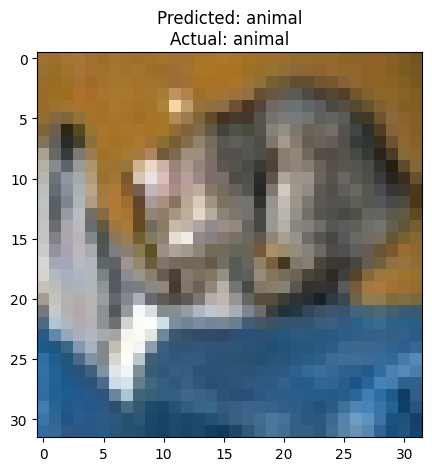

In [ ]:
plt.figure(figsize=(5, 5))
plt.imshow(testFeatures[0]) # show image

plt.title('Predicted: ' + convert(np.argmax(prediction[0])) + '\n' + 'Actual: ' + convert(np.argmax(testTarget[0])))

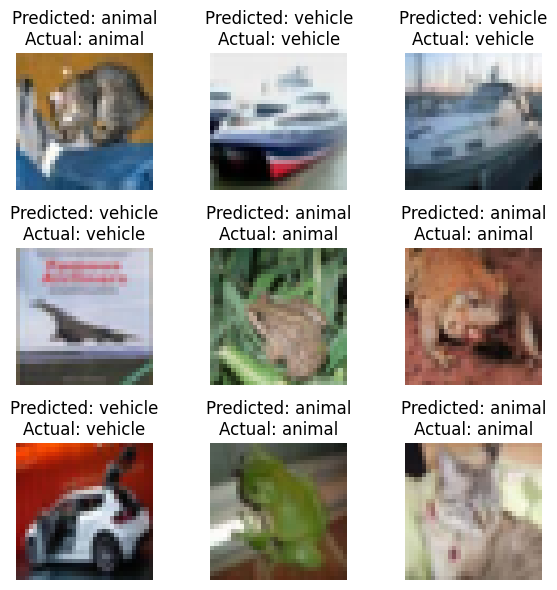

In [63]:
plt.figure(figsize=(6, 6))

for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.axis('off')
    plt.imshow(testFeatures[i])
    plt.title('Predicted: ' + convert(np.argmax(prediction[i])) + '\n' + 'Actual: ' + convert(np.argmax(testTarget[i])))

plt.tight_layout()

Text(33.222222222222214, 0.5, 'Prediction')

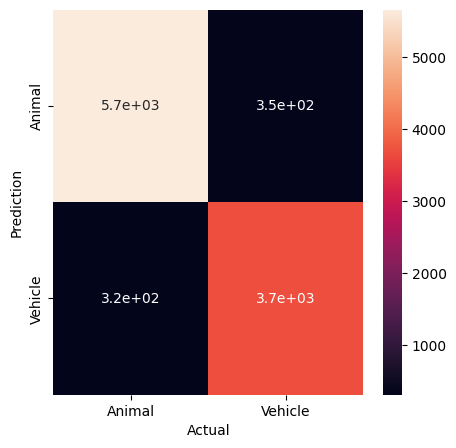

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sb

matrix = confusion_matrix(np.argmax(testTarget, 1), np.argmax(prediction, 1))


plt.figure(figsize=(5, 5))
sb.heatmap(matrix, annot=True, xticklabels=['Animal', 'Vehicle'], yticklabels=['Animal', 'Vehicle'])

plt.xlabel('Actual')
plt.ylabel('Prediction')